In [16]:
# author: René Kopeinig
# script: Compare and display cryptocurrency data
# description: Retrieve, compare and display Time-Series data of crypto currencies from Quandl.
#              This tutorial will show you a few basics how to handle 
#              Time-Series data using Pandas DataFrame

In [17]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [34]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import *

In [35]:
# Load BTC data 
btc = pd.read_csv('/home/rkopeinig/workspace/Time-Series-Analysis/data/btc.csv')
btc['date'] = pd.to_datetime(btc['date'])
btc = btc.set_index('date')

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



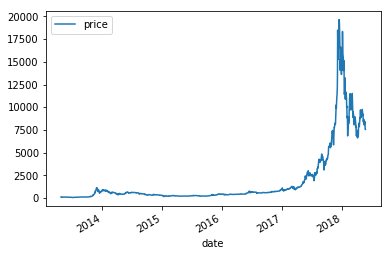

In [36]:
# Display Time-Series data price of Ethereum in Bitcoin
btc.plot(y=['price'])
plt.show()

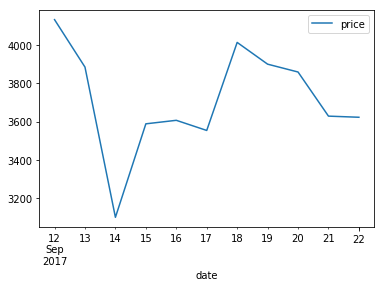

In [38]:
# You also can use the index to display any given time range.
btc['2017-09-12':'2017-09-22'].plot(y='price')
plt.show()

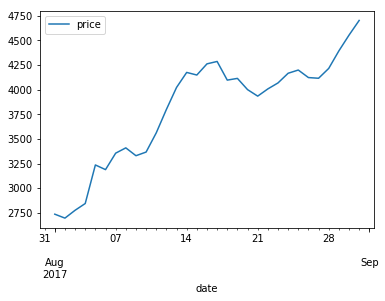

In [39]:
# Or one specific month
btc['2017-08'].plot(y='price')
plt.show()

In [40]:
# Retrieve all data where ETH was higher than 300 Euro
btc[btc['price']>300]

,price,market_cap,total_volume
date,,,
2013-11-08,332.020000,3.972445e+09,0.000000e+00
2013-11-09,358.000000,4.284553e+09,0.000000e+00
2013-11-10,313.000000,3.747322e+09,0.000000e+00
2013-11-11,340.550000,4.078793e+09,0.000000e+00
2013-11-12,355.480000,4.259335e+09,0.000000e+00
2013-11-13,404.170000,4.844513e+09,0.000000e+00
2013-11-14,408.840000,4.902329e+09,0.000000e+00
2013-11-15,424.160000,5.087746e+09,0.000000e+00
2013-11-16,437.410000,5.248843e+09,0.000000e+00


In [41]:
# Describe function shows all statistical information at once
btc.describe()

,price,market_cap,total_volume
count,1852.000000,1.783000e+03,1.832000e+03
mean,1862.386629,3.129808e+10,9.591342e+08
std,3344.749879,5.745757e+10,1.699225e+09
min,67.809000,7.713681e+08,0.000000e+00
25%,284.674875,3.956386e+09,3.061422e+07
50%,561.285000,7.526354e+09,1.312654e+08
75%,1035.731478,1.751002e+10,1.245499e+09
max,19665.394927,3.293157e+11,2.414430e+10


In [42]:
# Correlation coefficient for each field
btc.corr()

,price,market_cap,total_volume
price,1.000000,0.999874,0.642592
market_cap,0.999874,1.000000,0.642229
total_volume,0.642592,0.642229,1.000000
